# Regional separation

### Importing packages

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from fatiando.vis import mpl
import pandas as pd
import matplotlib as mpb
import matplotlib.patches as patches

/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


### Importing Anitapolis TFA data

In [2]:
dataset = pd.read_csv('anitapolis_large_decimated.txt', skipinitialspace=True, delim_whitespace=True)

In [3]:
xp = dataset['X'].get_values()
yp = dataset['Y'].get_values()
lat = dataset['LAT'].get_values()
long = dataset['LONG'].get_values()
zp = - dataset['GPSALT'].get_values()
dobs = dataset['MAGIGRF'].get_values()
alt = dataset['ALTURA'].get_values()
N = xp.size # número de pontos

### Data plot

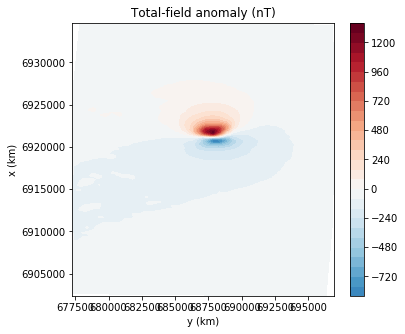

In [4]:
plt.figure(figsize=(6,5))

plt.subplot(1,1,1)
plt.title("Total-field anomaly (nT)")
#plt.axis('scaled')
norm=mpb.colors.Normalize(vmin=-np.max(dobs), vmax=np.max(dobs))
plt.tricontourf(yp, xp, dobs, 30, cmap ='RdBu_r', norm=norm)
plt.colorbar()
#plt.plot(yp, xp, 'ok', markersize=0.5)
plt.xlabel('y (km)')
plt.ylabel('x (km)')
#mpl.m2km()

plt.tight_layout(pad = 2.)

plt.show()

### Simple polynomial fitting

In [5]:
A = np.vstack((np.ones(N), xp, yp)).T

In [6]:
p1 = np.linalg.solve(np.dot(A.T,A),np.dot(A.T,dobs))

In [7]:
tfa_regional1 = np.dot(A,p1)

In [8]:
tfa_residual1 = dobs - tfa_regional1

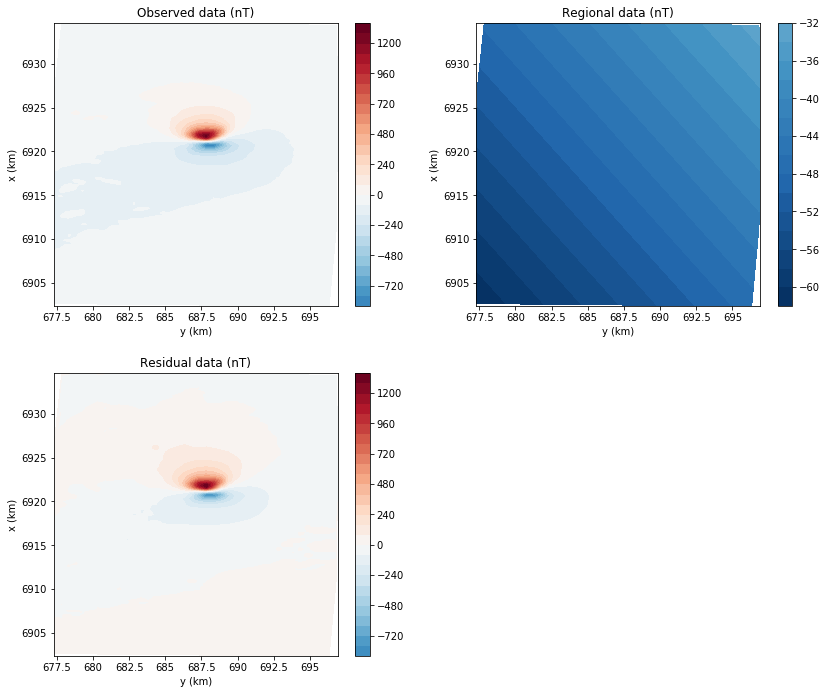

In [9]:
#plt.close('all')
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.title("Observed data (nT)")
norm=mpb.colors.Normalize(vmin=-np.max(dobs), vmax=np.max(dobs))
#plt.axis('scaled')
plt.tricontourf(yp, xp, dobs, 30, cmap = plt.get_cmap('RdBu_r'), norm=norm)
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,2)
plt.title("Regional data (nT)")
#plt.axis('scaled')
norm=mpb.colors.Normalize(vmin=np.min(tfa_regional1), vmax=-np.min(tfa_regional1))
plt.tricontourf(yp, xp, tfa_regional1, 15, cmap = plt.get_cmap('RdBu_r'), norm=norm)
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

plt.subplot(2,2,3)
plt.title("Residual data (nT)")
#plt.axis('scaled')
norm=mpb.colors.Normalize(vmin=-np.max(tfa_residual1), vmax=np.max(tfa_residual1))
plt.tricontourf(yp, xp, tfa_residual1, 30, cmap = plt.get_cmap('RdBu_r'), norm=norm)
plt.colorbar()
plt.xlabel('y (km)')
plt.ylabel('x (km)')
mpl.m2km()

# plt.subplot(2,2,4)
# plt.title("Campo esfera (nT)")
# #plt.axis('scaled')
# plt.tricontourf(yp, xp, dobs, 15, cmap = plt.get_cmap('RdBu_r'))
# plt.colorbar()
# plt.xlabel('y (km)')
# plt.ylabel('x (km)')
# mpl.m2km()

plt.tight_layout(pad = 2.)

plt.show()

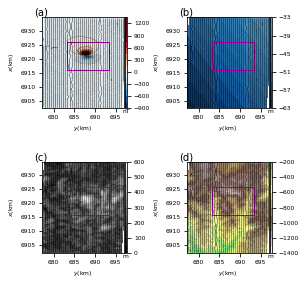

In [11]:
plt.figure(figsize=(4.33, 4.33))

ax1=plt.subplot(2,2,1)

plt.tricontour(yp, xp, dobs, 20, linewidths=0.2, colors='k')
plt.tricontourf(yp, xp, dobs, 20, cmap='RdBu_r',
               vmin=np.min(dobs),
               vmax=-np.min(dobs)).ax.tick_params(labelsize=6)
plt.plot(yp, xp, '.k', markersize=.1)
plt.xlabel('$y$(km)', fontsize=6)
plt.ylabel('$x$(km)', fontsize=6)
clb = plt.colorbar(pad=0.01, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=6)
clb.ax.set_title('nT', pad=-96, fontsize=6)
ax1.text(np.min(yp)-2000, np.max(xp)+800, '(a)', fontsize= 10)
# Create a Rectangle patch
rect = patches.Rectangle((683322.0,6916002.0), 10000,10000,linewidth=1,edgecolor='m',facecolor='none')

# Add the patch to the Axes
ax1.add_patch(rect)
mpl.m2km()

ax2=plt.subplot(2,2,2)
plt.tricontourf(yp, xp, tfa_regional1, 10, cmap='RdBu_r',
               vmin=np.min(tfa_regional1),
               vmax=-np.min(tfa_regional1)).ax.tick_params(labelsize=6)
plt.plot(yp, xp, 'k.', markersize=.1)
plt.xlabel('$y$(km)', fontsize=6)
plt.ylabel('$x$(km)', fontsize=6)
clb = plt.colorbar(pad=0.01, aspect=40, shrink=1)
clb.ax.set_title('m', pad=-96, fontsize=6)
clb.ax.tick_params(labelsize=6)
ax2.text(np.min(yp)-2000, np.max(xp)+800, '(b)', fontsize= 10)
# Create a Rectangle patch
rect = patches.Rectangle((683322.0,6916002.0), 10000,10000,linewidth=1,edgecolor='m',facecolor='none')

# Add the patch to the Axes
ax2.add_patch(rect)
mpl.m2km()

ax3=plt.subplot(2,2,3)
plt.tricontourf(yp, xp, alt, 10, cmap='gray').ax.tick_params(labelsize=6)
plt.plot(yp, xp, 'k.', markersize=.1)
plt.xlabel('$y$(km)', fontsize=6)
plt.ylabel('$x$(km)', fontsize=6)
clb = plt.colorbar(pad=0.01, aspect=40, shrink=1)
clb.ax.set_title('m', pad=-96, fontsize=6)
clb.ax.tick_params(labelsize=6)
ax3.text(np.min(yp)-2000, np.max(xp)+800, '(c)', fontsize= 10)
# Create a Rectangle patch
rect = patches.Rectangle((683322.0,6916002.0), 10000,10000,linewidth=1,edgecolor='m',facecolor='none')

# Add the patch to the Axes
ax3.add_patch(rect)
mpl.m2km()

ax4=plt.subplot(2,2,4)
plt.tricontourf(yp, xp, zp+alt, 10, cmap='terrain_r', vmax=300).ax.tick_params(labelsize=6)
plt.plot(yp, xp, 'k.', markersize=.1)
plt.xlabel('$y$(km)', fontsize=6)
plt.ylabel('$x$(km)', fontsize=6)
clb = plt.colorbar(pad=0.01, aspect=40, shrink=1)
clb.ax.set_title('m', pad=-96, fontsize=6)
clb.ax.tick_params(labelsize=6)
ax4.text(np.min(yp)-2000, np.max(xp)+800, '(d)', fontsize= 10)
# Create a Rectangle patch
rect = patches.Rectangle((683322.0,6916002.0), 10000,10000,linewidth=1,edgecolor='m',facecolor='none')

# Add the patch to the Axes
ax4.add_patch(rect)
mpl.m2km()

plt.subplots_adjust(wspace=.5, hspace=.6)
plt.savefig('../../manuscript/figures/anitapolis_data.png', dpi=1200, bbox_inches='tight')
plt.show()

In [ ]:
dataset.insert(3, "mag_res1", tfa_residual1)

In [ ]:
dataset.to_csv('anitapolis_decimated_tfa_residual.txt', sep=' ')